<a href="https://colab.research.google.com/github/vlad-danaila/machine-learning-workout/blob/master/Exercise_4_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Style Transfer**

In [482]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [483]:
!pip3 install torch torchvision

In [0]:
import numpy as np
import torch as t
import torchvision as tv
import matplotlib.pyplot as plt
import PIL as pil

# t.autograd.set_detect_anomaly(True)

In [0]:
def to_numpy(x):
  return x.cpu().detach().numpy()

Load images

In [0]:
normalization = .5, .5, .5

transforms = tv.transforms.Compose([
  tv.transforms.Resize(128),
  tv.transforms.ToTensor(),
  tv.transforms.Normalize(normalization, normalization)  
])

def load_img(path):
  img = pil.Image.open(path)
  img = transforms(img)
  return img.cuda()

def plot_img(img): 
  img = np.transpose(to_numpy(img), (1, 2, 0))
  img = (img * np.array(normalization)) + np.array(normalization)
  plt.imshow(img)
  plt.show()
  
img_content = load_img('/content/drive/My Drive/city.jpg').cuda()
img_style = load_img('/content/drive/My Drive/starry_night.jpg').cuda().requires_grad_(True)
img_result = img_content.clone().requires_grad_(True)

Define model

In [0]:
model = tv.models.vgg19(pretrained = True).cuda()

for param in model.parameters():
  param.requires_grad = False

Compute Gramm Matrix

In [0]:
def gramm(x):
  x = x.view(x.shape[1], -1)
  gram = t.mm(x, x.t())
  return gram

In [0]:
selected_style_layers = {0, 5, 10, 19, 28, 36}

def layers_feats(img):
  img = img.unsqueeze(0)
  feats = {}
  for i in range(len(model.features)):
    img = model.features[i](img)
    if i in selected_style_layers:
      feats[i] = img.clone()
  return feats

feats_style = layers_feats(img_style)
gramms_style = { i : gramm(feats_style[i]) for i in feats_style }

In [0]:
def update_result():
  feats_result = layers_feats(img_result)
  gramms_result = { i : gramm(feats_result[i]) for i in feats_result }
  total_error = t.tensor(0.).cuda()
  for i in gramms_style:
    total_error += t.nn.functional.mse_loss(gramms_result[i], gramms_style[i])
  total_error.backward(retain_graph=True)
  optimizer.step()
  optimizer.zero_grad()

Step 0


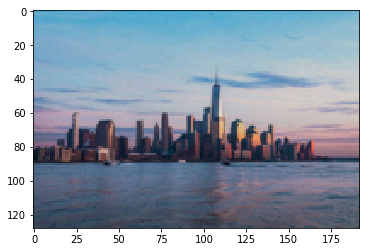

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 100


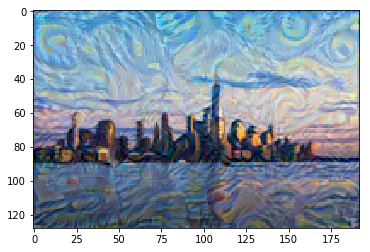

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 200


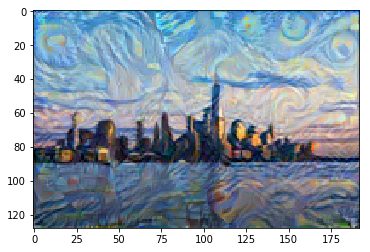

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 300


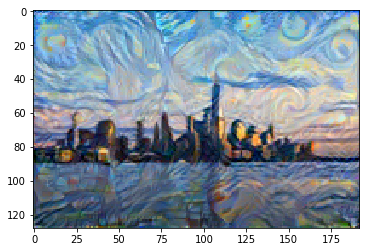

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 400


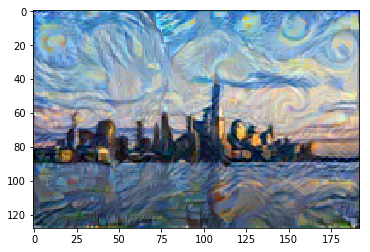

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 500


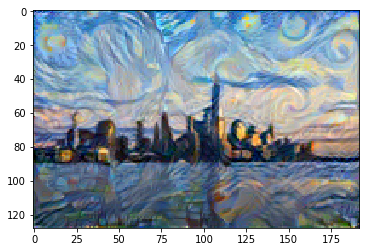

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 600


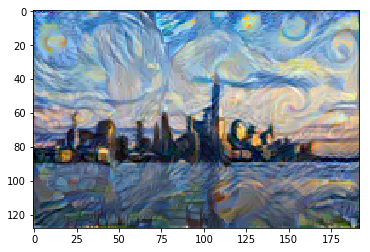

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 700


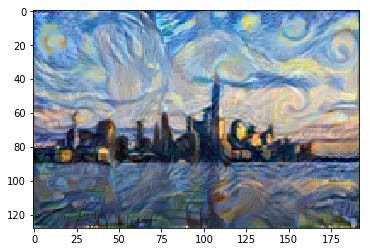

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 800


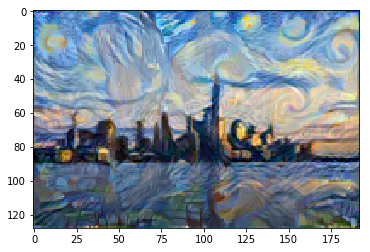

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 900


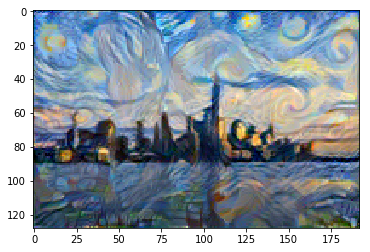

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 1000


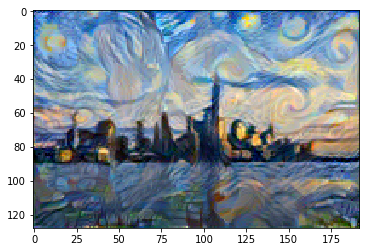

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 1100


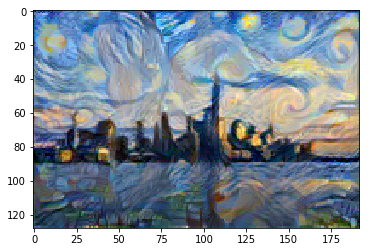

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 1200


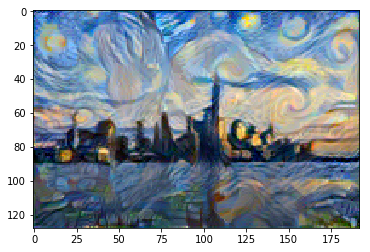

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 1300


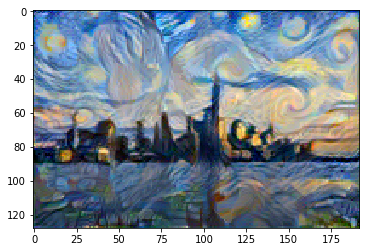

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 1400


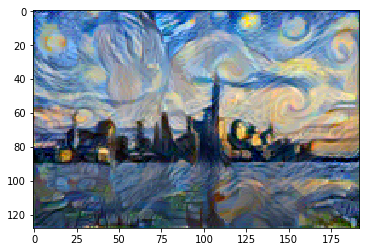

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 1500


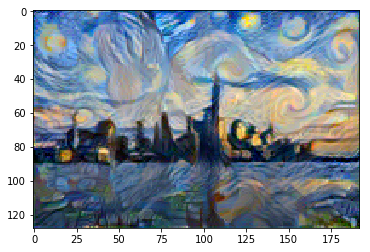

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 1600


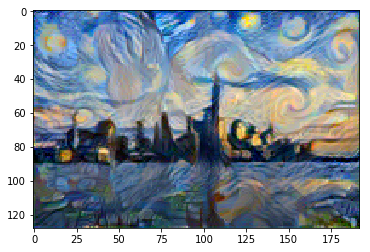

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 1700


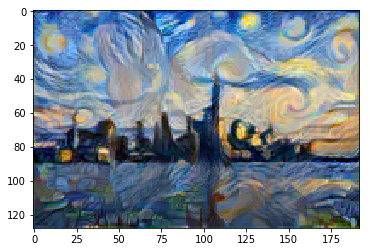

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 1800


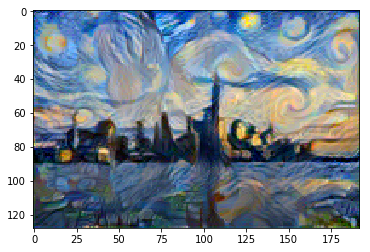

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 1900


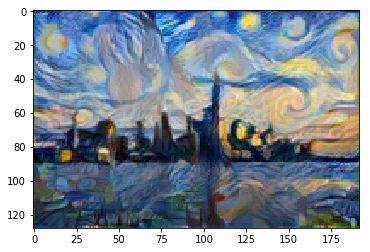

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 2000


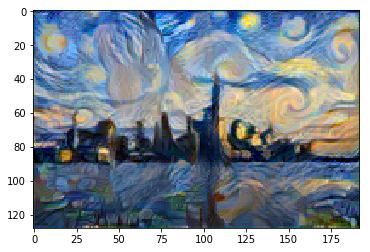

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 2100


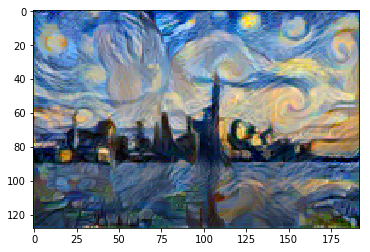

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 2200


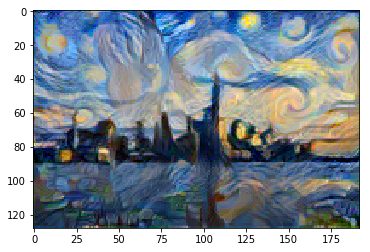

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 2300


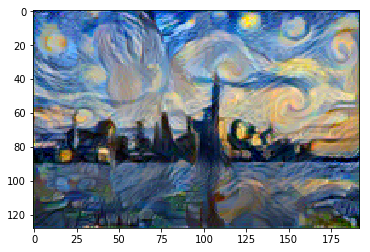

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 2400


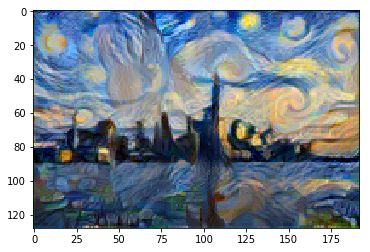

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 2500


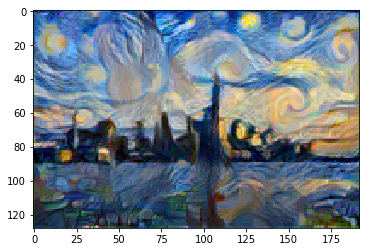

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 2600


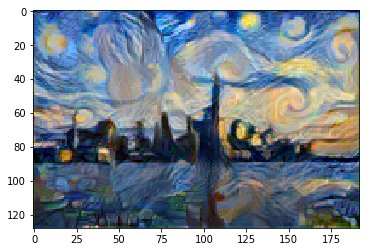

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 2700


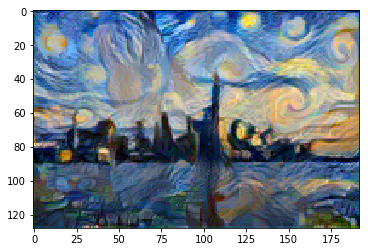

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 2800


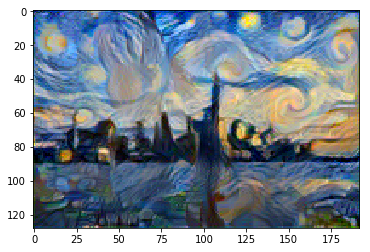

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 2900


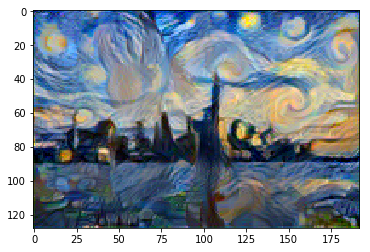

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 3000


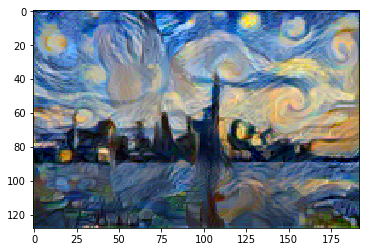

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 3100


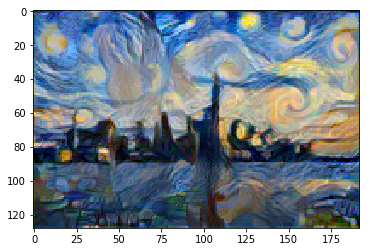

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 3200


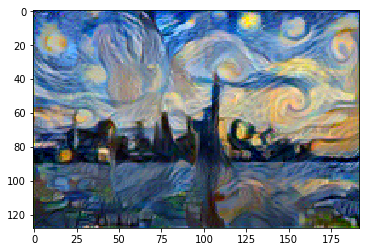

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 3300


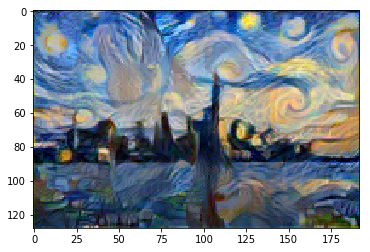

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 3400


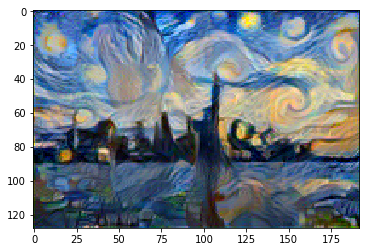

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 3500


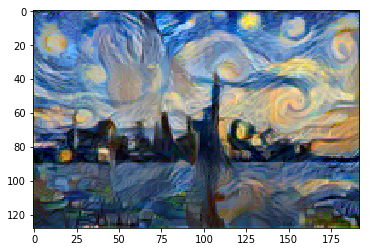

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 3600


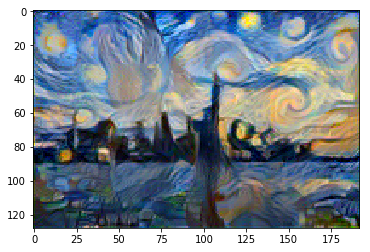

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 3700


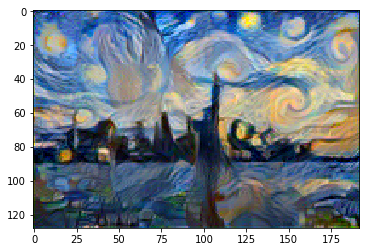

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 3800


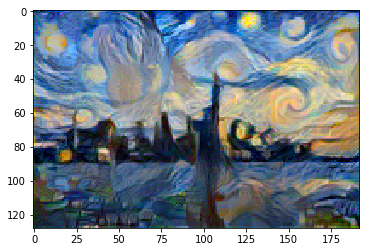

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 3900


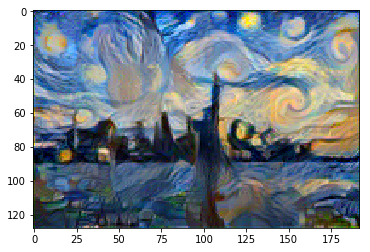

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 4000


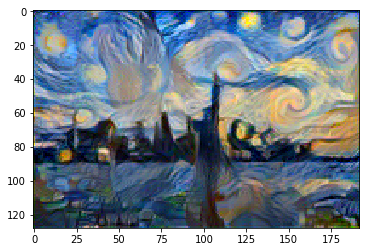

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 4100


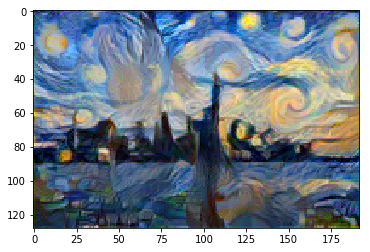

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 4200


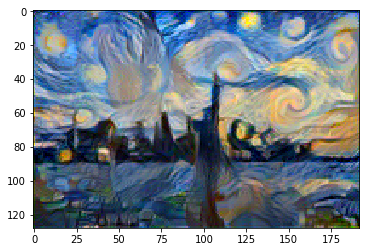

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 4300


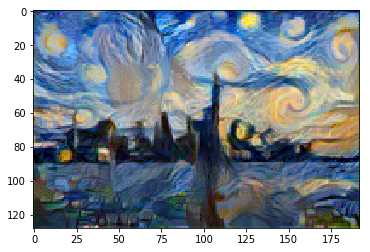

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 4400


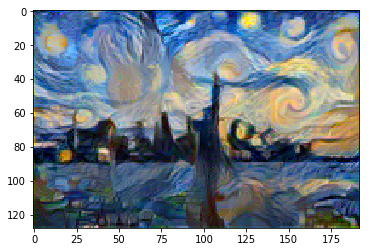

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 4500


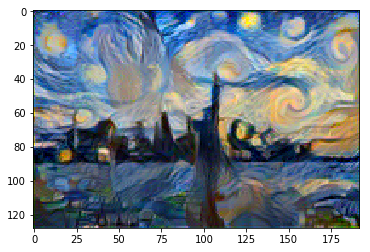

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 4600


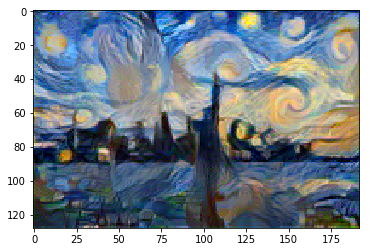

KeyboardInterrupt: ignored

In [491]:
steps = 50_000
optimizer = t.optim.Adam([img_result], lr = 1e-2)
  
for i in range(steps):
  update_result()
  if i % 100 == 0:
    print('Step', i)
    plot_img(img_result)   

In [0]:
model